# Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import string
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import wordnet
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim import corpora, models,similarities
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations
from ast import literal_eval
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer, models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


# Data set exploration

In [9]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

In [10]:
df_train

,condition_label,medical_abstract
0,5,Tissue changes around loose prostheses. A cani...
1,1,Neuropeptide Y and neuron-specific enolase lev...
2,2,"Sexually transmitted diseases of the colon, re..."
3,1,Lipolytic factors associated with murine and h...
4,3,Does carotid restenosis predict an increased r...
...,...,...
11545,1,Epirubicin at two dose levels with prednisolon...
11546,1,Four and a half year follow up of women with d...
11547,5,Safety of the transbronchial biopsy in outpati...
11548,3,Interictal spikes and hippocampal somatostatin...


In [11]:
df_train["condition_label"].value_counts()/df_train.shape[0]*100

condition_label
5    33.281385
1    21.904762
4    21.134199
3    13.333333
2    10.346320
Name: count, dtype: float64

In [12]:
df_train.isnull().values.any()

False

In [13]:
len_abstracts = []
for index, row in df_train.iterrows():
    words = word_tokenize(row.medical_abstract)
    num_words = len(words)
    len_abstracts.append(num_words)

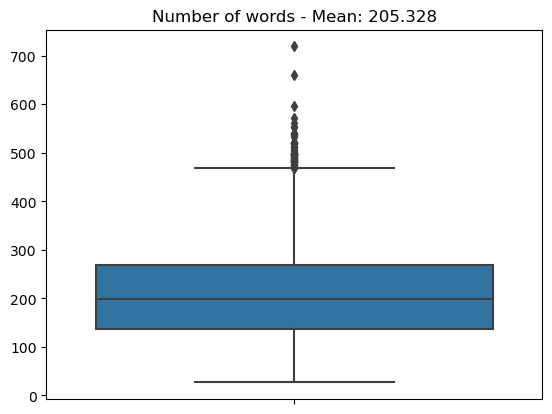

In [14]:
sns.boxplot( y=len_abstracts);
plt.title("Number of words - Mean: " + str(np.round(np.mean(len_abstracts), 3)))
plt.show()

In [15]:
df_test

,condition_label,medical_abstract
0,3,Obstructive sleep apnea following topical orop...
1,5,Neutrophil function and pyogenic infections in...
2,5,A phase II study of combined methotrexate and ...
3,1,Flow cytometric DNA analysis of parathyroid tu...
4,4,Paraneoplastic vasculitic neuropathy: a treata...
...,...,...
2883,4,Management of aortobronchial fistula with graf...
2884,5,Tuberculous psoas muscle abscess following che...
2885,4,Clinical evaluation of high-frequency (ultraso...
2886,1,Antitumor activity of liposome-encapsulated do...


In [16]:
df_test["condition_label"].value_counts()/df_test.shape[0]*100

condition_label
5    33.275623
1    21.918283
4    21.121884
3    13.331025
2    10.353186
Name: count, dtype: float64

In [17]:
pd.concat([df_test["condition_label"], df_train["condition_label"]]).value_counts()/(df_test.shape[0]+df_train.shape[0])*100

condition_label
5    33.280233
1    21.907466
4    21.131736
3    13.332872
2    10.347694
Name: count, dtype: float64

In [18]:
df_test.isnull().values.any()

False

In [19]:
len_abstracts = []
for index, row in df_test.iterrows():
    words = word_tokenize(row.medical_abstract)
    num_words = len(words)
    len_abstracts.append(num_words)

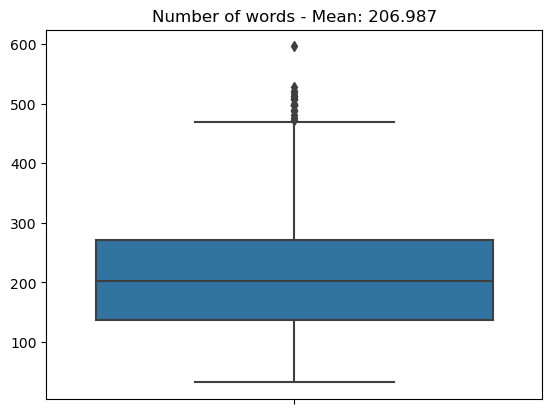

In [20]:
sns.boxplot( y=len_abstracts);
plt.title("Number of words - Mean: " + str(np.round(np.mean(len_abstracts), 3)))
plt.show()

In [21]:
df_labels

,condition_label,condition_name
0,1,neoplasms
1,2,digestive system diseases
2,3,nervous system diseases
3,4,cardiovascular diseases
4,5,general pathological conditions


# Preprocessing 

In [22]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

## Whitespaces

In [16]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines:  0
Number of tabs:  0
Number of 2 tabs:  0
Number of tab and newline:  0


In [17]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_test.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines:  0
Number of tabs:  0
Number of 2 tabs:  0
Number of tab and newline:  0


## Case folding

In [18]:
newAbs = []
for index, row in df_train.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_train.medical_abstract = newAbs

In [19]:
newAbs = []
for index, row in df_test.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_test.medical_abstract = newAbs

## Punctuation

In [20]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [21]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_punctuation(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_punctuation(x))

In [22]:
df_train

,condition_label,medical_abstract
0,5,tissue changes around loose prostheses a canin...
1,1,neuropeptide y and neuronspecific enolase leve...
2,2,sexually transmitted diseases of the colon rec...
3,1,lipolytic factors associated with murine and h...
4,3,does carotid restenosis predict an increased r...
...,...,...
11545,1,epirubicin at two dose levels with prednisolon...
11546,1,four and a half year follow up of women with d...
11547,5,safety of the transbronchial biopsy in outpati...
11548,3,interictal spikes and hippocampal somatostatin...


In [23]:
df_test

,condition_label,medical_abstract
0,3,obstructive sleep apnea following topical orop...
1,5,neutrophil function and pyogenic infections in...
2,5,a phase ii study of combined methotrexate and ...
3,1,flow cytometric dna analysis of parathyroid tu...
4,4,paraneoplastic vasculitic neuropathy a treatab...
...,...,...
2883,4,management of aortobronchial fistula with graf...
2884,5,tuberculous psoas muscle abscess following che...
2885,4,clinical evaluation of highfrequency ultrasoni...
2886,1,antitumor activity of liposomeencapsulated dox...


## Numbers

In [24]:
cont_number = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    cont_number += sum(c.isdigit() for c in text)
cont_number

230772

In [25]:
cont_abs = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    if(sum(c.isdigit() for c in text) > 0):
        cont_abs+= 1
cont_abs/df_train.shape[0]*100

82.45887445887445

In [26]:
df_train['medical_abstract']= df_train['medical_abstract'].apply(lambda x: re.sub(r'\d+', '', x))
df_test['medical_abstract']= df_test['medical_abstract'].apply(lambda x: re.sub(r'\d+', '', x))

In [27]:
number_words_pattern = r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten)\b'

In [28]:
df_train['medical_abstract']= df_train['medical_abstract'].apply(lambda x: re.sub(number_words_pattern, '', x, flags=re.IGNORECASE))
df_test['medical_abstract']= df_test['medical_abstract'].apply(lambda x: re.sub(number_words_pattern, '', x, flags=re.IGNORECASE))

## Remove links

In [29]:
def remove_links(text):
    remove_https = re.sub(r'http\S+', ' ', text)
    remove_com = re.sub(r"www\.[A-Za-z]*\.com", " ", remove_https)
    return remove_com

In [30]:
df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_links(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_links(x))

In [31]:
df_train

,condition_label,medical_abstract
0,5,tissue changes around loose prostheses a canin...
1,1,neuropeptide y and neuronspecific enolase leve...
2,2,sexually transmitted diseases of the colon rec...
3,1,lipolytic factors associated with murine and h...
4,3,does carotid restenosis predict an increased r...
...,...,...
11545,1,epirubicin at dose levels with prednisolone a...
11546,1,and a half year follow up of women with dyska...
11547,5,safety of the transbronchial biopsy in outpati...
11548,3,interictal spikes and hippocampal somatostatin...


## Stop Words, repeated characters

In [32]:
from nltk.corpus import stopwords

In [33]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['month', 'one', 'leave', 'patient','patients','study','group', 'child', 'case', 'b', 'show',
                        'disease','p','less','use','case','treatment','year','result','increase', 'effect', 'level', 'may'])

def remove_stopwords(text):
    tokenized_text = WordPunctTokenizer().tokenize(text)
    tokenized_text_without_stopwords = []
    for token in tokenized_text:
        if token.lower() not in stop_words:
            if('patient' not in token.lower() and 'patients' not in token.lower()):
                tokenized_text_without_stopwords.append(token)
    return ' '.join(tokenized_text_without_stopwords)

In [34]:
x = df_train['medical_abstract']
y = df_test['medical_abstract']
df_train['medical_abstract'] = x.apply(remove_stopwords)
df_test['medical_abstract'] = y.apply(remove_stopwords)

In [35]:
def character_repeatation(text):
    # Pattern matching for all case alphabets
    # \1   It refers to the first capturing group.
    # {2,} It means we are matching for repetition that occurs more than two times (or equal).
    # r’\1\1' → It limits all the repetition to two characters.
    Pattern_alpha = re.compile(r"([A-Za-z])\1{2,}", re.DOTALL)
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text)
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    return Combined_Formatted

In [36]:
x = df_train['medical_abstract']
y = df_test['medical_abstract']
df_train['medical_abstract'] = x.apply(character_repeatation)
df_test['medical_abstract'] = y.apply(character_repeatation)

## Tokenization

In [37]:
def tokenize(text):
    return WordPunctTokenizer().tokenize(text)

In [38]:
df_train['medical_abstract_token'] = df_train['medical_abstract'].apply(lambda x: tokenize(x))
df_test['medical_abstract_token'] = df_test['medical_abstract'].apply(lambda x: tokenize(x))

In [39]:
df_train

,condition_label,medical_abstract,medical_abstract_token
0,5,tissue changes around loose prostheses canine ...,"[tissue, changes, around, loose, prostheses, c..."
1,1,neuropeptide neuronspecific enolase levels ben...,"[neuropeptide, neuronspecific, enolase, levels..."
2,2,sexually transmitted diseases colon rectum anu...,"[sexually, transmitted, diseases, colon, rectu..."
3,1,lipolytic factors associated murine human canc...,"[lipolytic, factors, associated, murine, human..."
4,3,carotid restenosis predict increased risk late...,"[carotid, restenosis, predict, increased, risk..."
...,...,...,...
11545,1,epirubicin dose levels prednisolone advanced b...,"[epirubicin, dose, levels, prednisolone, advan..."
11546,1,half follow women dyskaryotic cervical smears ...,"[half, follow, women, dyskaryotic, cervical, s..."
11547,5,safety transbronchial biopsy objective determi...,"[safety, transbronchial, biopsy, objective, de..."
11548,3,interictal spikes hippocampal somatostatin lev...,"[interictal, spikes, hippocampal, somatostatin..."


## POS Tagging

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [42]:
def pos(tokens):
    return nltk.pos_tag(tokens, tagset='universal')

In [43]:
df_train['medical_abstract_pos'] = df_train['medical_abstract_token'].apply(lambda x: pos(x))
df_test['medical_abstract_pos'] = df_test['medical_abstract_token'].apply(lambda x: pos(x))

In [44]:
df_train

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos
0,5,tissue changes around loose prostheses canine ...,"[tissue, changes, around, loose, prostheses, c...","[(tissue, NOUN), (changes, NOUN), (around, ADP..."
1,1,neuropeptide neuronspecific enolase levels ben...,"[neuropeptide, neuronspecific, enolase, levels...","[(neuropeptide, ADV), (neuronspecific, ADJ), (..."
2,2,sexually transmitted diseases colon rectum anu...,"[sexually, transmitted, diseases, colon, rectu...","[(sexually, ADV), (transmitted, VERB), (diseas..."
3,1,lipolytic factors associated murine human canc...,"[lipolytic, factors, associated, murine, human...","[(lipolytic, ADJ), (factors, NOUN), (associate..."
4,3,carotid restenosis predict increased risk late...,"[carotid, restenosis, predict, increased, risk...","[(carotid, NOUN), (restenosis, NOUN), (predict..."
...,...,...,...,...
11545,1,epirubicin dose levels prednisolone advanced b...,"[epirubicin, dose, levels, prednisolone, advan...","[(epirubicin, NOUN), (dose, NOUN), (levels, NO..."
11546,1,half follow women dyskaryotic cervical smears ...,"[half, follow, women, dyskaryotic, cervical, s...","[(half, NOUN), (follow, ADJ), (women, NOUN), (..."
11547,5,safety transbronchial biopsy objective determi...,"[safety, transbronchial, biopsy, objective, de...","[(safety, NOUN), (transbronchial, ADJ), (biops..."
11548,3,interictal spikes hippocampal somatostatin lev...,"[interictal, spikes, hippocampal, somatostatin...","[(interictal, ADJ), (spikes, NOUN), (hippocamp..."


## Lemmatization

In [45]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def lemmatize_sentence(tagged_sentence):
    lemmatized_sentence = []
    for word, tag in tagged_sentence:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            if(get_wordnet_pos(tag) != ''):
                lemmatized_sentence.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
            else:
                lemmatized_sentence.append(word)
    return lemmatized_sentence

In [46]:
df_train['medical_abstract_lemma_token'] = df_train['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))
df_test['medical_abstract_lemma_token'] = df_test['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))

In [47]:
df_train

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token
0,5,tissue changes around loose prostheses canine ...,"[tissue, changes, around, loose, prostheses, c...","[(tissue, NOUN), (changes, NOUN), (around, ADP...","[tissue, change, around, loose, prosthesis, ca..."
1,1,neuropeptide neuronspecific enolase levels ben...,"[neuropeptide, neuronspecific, enolase, levels...","[(neuropeptide, ADV), (neuronspecific, ADJ), (...","[neuropeptide, neuronspecific, enolase, level,..."
2,2,sexually transmitted diseases colon rectum anu...,"[sexually, transmitted, diseases, colon, rectu...","[(sexually, ADV), (transmitted, VERB), (diseas...","[sexually, transmit, disease, colon, rectum, a..."
3,1,lipolytic factors associated murine human canc...,"[lipolytic, factors, associated, murine, human...","[(lipolytic, ADJ), (factors, NOUN), (associate...","[lipolytic, factor, associate, murine, human, ..."
4,3,carotid restenosis predict increased risk late...,"[carotid, restenosis, predict, increased, risk...","[(carotid, NOUN), (restenosis, NOUN), (predict...","[carotid, restenosis, predict, increase, risk,..."
...,...,...,...,...,...
11545,1,epirubicin dose levels prednisolone advanced b...,"[epirubicin, dose, levels, prednisolone, advan...","[(epirubicin, NOUN), (dose, NOUN), (levels, NO...","[epirubicin, dose, level, prednisolone, advanc..."
11546,1,half follow women dyskaryotic cervical smears ...,"[half, follow, women, dyskaryotic, cervical, s...","[(half, NOUN), (follow, ADJ), (women, NOUN), (...","[half, follow, woman, dyskaryotic, cervical, s..."
11547,5,safety transbronchial biopsy objective determi...,"[safety, transbronchial, biopsy, objective, de...","[(safety, NOUN), (transbronchial, ADJ), (biops...","[safety, transbronchial, biopsy, objective, de..."
11548,3,interictal spikes hippocampal somatostatin lev...,"[interictal, spikes, hippocampal, somatostatin...","[(interictal, ADJ), (spikes, NOUN), (hippocamp...","[interictal, spike, hippocampal, somatostatin,..."


## Merge processed tokens

In [48]:
def merge(tokens):
    return " ".join(tokens)

In [49]:
df_train['medical_abstract_lemma'] = df_train['medical_abstract_lemma_token'].apply(lambda x: merge(x))
df_test['medical_abstract_lemma'] = df_test['medical_abstract_lemma_token'].apply(lambda x: merge(x))

In [50]:
df_train

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma
0,5,tissue changes around loose prostheses canine ...,"[tissue, changes, around, loose, prostheses, c...","[(tissue, NOUN), (changes, NOUN), (around, ADP...","[tissue, change, around, loose, prosthesis, ca...",tissue change around loose prosthesis canine m...
1,1,neuropeptide neuronspecific enolase levels ben...,"[neuropeptide, neuronspecific, enolase, levels...","[(neuropeptide, ADV), (neuronspecific, ADJ), (...","[neuropeptide, neuronspecific, enolase, level,...",neuropeptide neuronspecific enolase level beni...
2,2,sexually transmitted diseases colon rectum anu...,"[sexually, transmitted, diseases, colon, rectu...","[(sexually, ADV), (transmitted, VERB), (diseas...","[sexually, transmit, disease, colon, rectum, a...",sexually transmit disease colon rectum anus ch...
3,1,lipolytic factors associated murine human canc...,"[lipolytic, factors, associated, murine, human...","[(lipolytic, ADJ), (factors, NOUN), (associate...","[lipolytic, factor, associate, murine, human, ...",lipolytic factor associate murine human cancer...
4,3,carotid restenosis predict increased risk late...,"[carotid, restenosis, predict, increased, risk...","[(carotid, NOUN), (restenosis, NOUN), (predict...","[carotid, restenosis, predict, increase, risk,...",carotid restenosis predict increase risk late ...
...,...,...,...,...,...,...
11545,1,epirubicin dose levels prednisolone advanced b...,"[epirubicin, dose, levels, prednisolone, advan...","[(epirubicin, NOUN), (dose, NOUN), (levels, NO...","[epirubicin, dose, level, prednisolone, advanc...",epirubicin dose level prednisolone advanced br...
11546,1,half follow women dyskaryotic cervical smears ...,"[half, follow, women, dyskaryotic, cervical, s...","[(half, NOUN), (follow, ADJ), (women, NOUN), (...","[half, follow, woman, dyskaryotic, cervical, s...",half follow woman dyskaryotic cervical smear o...
11547,5,safety transbronchial biopsy objective determi...,"[safety, transbronchial, biopsy, objective, de...","[(safety, NOUN), (transbronchial, ADJ), (biops...","[safety, transbronchial, biopsy, objective, de...",safety transbronchial biopsy objective determi...
11548,3,interictal spikes hippocampal somatostatin lev...,"[interictal, spikes, hippocampal, somatostatin...","[(interictal, ADJ), (spikes, NOUN), (hippocamp...","[interictal, spike, hippocampal, somatostatin,...",interictal spike hippocampal somatostatin leve...


In [51]:
df_test

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma
0,3,obstructive sleep apnea following topical orop...,"[obstructive, sleep, apnea, following, topical...","[(obstructive, ADJ), (sleep, ADJ), (apnea, NOU...","[obstructive, sleep, apnea, follow, topical, o...",obstructive sleep apnea follow topical orophar...
1,5,neutrophil function pyogenic infections bone m...,"[neutrophil, function, pyogenic, infections, b...","[(neutrophil, ADJ), (function, NOUN), (pyogeni...","[neutrophil, function, pyogenic, infection, bo...",neutrophil function pyogenic infection bone ma...
2,5,phase ii combined methotrexate teniposide infu...,"[phase, ii, combined, methotrexate, teniposide...","[(phase, NOUN), (ii, NOUN), (combined, VERB), ...","[phase, ii, combine, methotrexate, teniposide,...",phase ii combine methotrexate teniposide infus...
3,1,flow cytometric dna analysis parathyroid tumor...,"[flow, cytometric, dna, analysis, parathyroid,...","[(flow, NOUN), (cytometric, NOUN), (dna, NOUN)...","[flow, cytometric, dna, analysis, parathyroid,...",flow cytometric dna analysis parathyroid tumor...
4,4,paraneoplastic vasculitic neuropathy treatable...,"[paraneoplastic, vasculitic, neuropathy, treat...","[(paraneoplastic, ADJ), (vasculitic, ADJ), (ne...","[paraneoplastic, vasculitic, neuropathy, treat...",paraneoplastic vasculitic neuropathy treatable...
...,...,...,...,...,...,...
2883,4,management aortobronchial fistula graft replac...,"[management, aortobronchial, fistula, graft, r...","[(management, NOUN), (aortobronchial, ADJ), (f...","[management, aortobronchial, fistula, graft, r...",management aortobronchial fistula graft replac...
2884,5,tuberculous psoas muscle abscess following che...,"[tuberculous, psoas, muscle, abscess, followin...","[(tuberculous, ADJ), (psoas, NOUN), (muscle, N...","[tuberculous, psoas, muscle, abscess, follow, ...",tuberculous psoas muscle abscess follow chemop...
2885,4,clinical evaluation highfrequency ultrasonic m...,"[clinical, evaluation, highfrequency, ultrason...","[(clinical, ADJ), (evaluation, NOUN), (highfre...","[clinical, evaluation, highfrequency, ultrason...",clinical evaluation highfrequency ultrasonic m...
2886,1,antitumor activity liposomeencapsulated doxoru...,"[antitumor, activity, liposomeencapsulated, do...","[(antitumor, NOUN), (activity, NOUN), (liposom...","[antitumor, activity, liposomeencapsulated, do...",antitumor activity liposomeencapsulated doxoru...


In [52]:
newAbs = []
for index, row in df_train.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_train.medical_abstract = newAbs

In [53]:
newAbs = []
for index, row in df_test.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_test.medical_abstract = newAbs

In [54]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [55]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_punctuation(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_punctuation(x))

In [56]:
df_train

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma
0,5,tissue changes around loose prostheses canine ...,"[tissue, changes, around, loose, prostheses, c...","[(tissue, NOUN), (changes, NOUN), (around, ADP...","[tissue, change, around, loose, prosthesis, ca...",tissue change around loose prosthesis canine m...
1,1,neuropeptide neuronspecific enolase levels ben...,"[neuropeptide, neuronspecific, enolase, levels...","[(neuropeptide, ADV), (neuronspecific, ADJ), (...","[neuropeptide, neuronspecific, enolase, level,...",neuropeptide neuronspecific enolase level beni...
2,2,sexually transmitted diseases colon rectum anu...,"[sexually, transmitted, diseases, colon, rectu...","[(sexually, ADV), (transmitted, VERB), (diseas...","[sexually, transmit, disease, colon, rectum, a...",sexually transmit disease colon rectum anus ch...
3,1,lipolytic factors associated murine human canc...,"[lipolytic, factors, associated, murine, human...","[(lipolytic, ADJ), (factors, NOUN), (associate...","[lipolytic, factor, associate, murine, human, ...",lipolytic factor associate murine human cancer...
4,3,carotid restenosis predict increased risk late...,"[carotid, restenosis, predict, increased, risk...","[(carotid, NOUN), (restenosis, NOUN), (predict...","[carotid, restenosis, predict, increase, risk,...",carotid restenosis predict increase risk late ...
...,...,...,...,...,...,...
11545,1,epirubicin dose levels prednisolone advanced b...,"[epirubicin, dose, levels, prednisolone, advan...","[(epirubicin, NOUN), (dose, NOUN), (levels, NO...","[epirubicin, dose, level, prednisolone, advanc...",epirubicin dose level prednisolone advanced br...
11546,1,half follow women dyskaryotic cervical smears ...,"[half, follow, women, dyskaryotic, cervical, s...","[(half, NOUN), (follow, ADJ), (women, NOUN), (...","[half, follow, woman, dyskaryotic, cervical, s...",half follow woman dyskaryotic cervical smear o...
11547,5,safety transbronchial biopsy objective determi...,"[safety, transbronchial, biopsy, objective, de...","[(safety, NOUN), (transbronchial, ADJ), (biops...","[safety, transbronchial, biopsy, objective, de...",safety transbronchial biopsy objective determi...
11548,3,interictal spikes hippocampal somatostatin lev...,"[interictal, spikes, hippocampal, somatostatin...","[(interictal, ADJ), (spikes, NOUN), (hippocamp...","[interictal, spike, hippocampal, somatostatin,...",interictal spike hippocampal somatostatin leve...


In [57]:
df_test

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma
0,3,obstructive sleep apnea following topical orop...,"[obstructive, sleep, apnea, following, topical...","[(obstructive, ADJ), (sleep, ADJ), (apnea, NOU...","[obstructive, sleep, apnea, follow, topical, o...",obstructive sleep apnea follow topical orophar...
1,5,neutrophil function pyogenic infections bone m...,"[neutrophil, function, pyogenic, infections, b...","[(neutrophil, ADJ), (function, NOUN), (pyogeni...","[neutrophil, function, pyogenic, infection, bo...",neutrophil function pyogenic infection bone ma...
2,5,phase ii combined methotrexate teniposide infu...,"[phase, ii, combined, methotrexate, teniposide...","[(phase, NOUN), (ii, NOUN), (combined, VERB), ...","[phase, ii, combine, methotrexate, teniposide,...",phase ii combine methotrexate teniposide infus...
3,1,flow cytometric dna analysis parathyroid tumor...,"[flow, cytometric, dna, analysis, parathyroid,...","[(flow, NOUN), (cytometric, NOUN), (dna, NOUN)...","[flow, cytometric, dna, analysis, parathyroid,...",flow cytometric dna analysis parathyroid tumor...
4,4,paraneoplastic vasculitic neuropathy treatable...,"[paraneoplastic, vasculitic, neuropathy, treat...","[(paraneoplastic, ADJ), (vasculitic, ADJ), (ne...","[paraneoplastic, vasculitic, neuropathy, treat...",paraneoplastic vasculitic neuropathy treatable...
...,...,...,...,...,...,...
2883,4,management aortobronchial fistula graft replac...,"[management, aortobronchial, fistula, graft, r...","[(management, NOUN), (aortobronchial, ADJ), (f...","[management, aortobronchial, fistula, graft, r...",management aortobronchial fistula graft replac...
2884,5,tuberculous psoas muscle abscess following che...,"[tuberculous, psoas, muscle, abscess, followin...","[(tuberculous, ADJ), (psoas, NOUN), (muscle, N...","[tuberculous, psoas, muscle, abscess, follow, ...",tuberculous psoas muscle abscess follow chemop...
2885,4,clinical evaluation highfrequency ultrasonic m...,"[clinical, evaluation, highfrequency, ultrason...","[(clinical, ADJ), (evaluation, NOUN), (highfre...","[clinical, evaluation, highfrequency, ultrason...",clinical evaluation highfrequency ultrasonic m...
2886,1,antitumor activity liposomeencapsulated doxoru...,"[antitumor, activity, liposomeencapsulated, do...","[(antitumor, NOUN), (activity, NOUN), (liposom...","[antitumor, activity, liposomeencapsulated, do...",antitumor activity liposomeencapsulated doxoru...


## Save preprocessed dataframes

In [58]:
df_train.to_csv("./dataset/medical_tc_train_preprocessed.csv")
df_test.to_csv("./dataset/medical_tc_test_preprocessed.csv")

# Document representation

In [52]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [53]:
df_train

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma
0,5,tissue changes around loose prostheses canine ...,"['tissue', 'changes', 'around', 'loose', 'pros...","[('tissue', 'NOUN'), ('changes', 'NOUN'), ('ar...","['tissue', 'change', 'around', 'loose', 'prost...",tissue change around loose prosthesis canine m...
1,1,neuropeptide neuronspecific enolase levels ben...,"['neuropeptide', 'neuronspecific', 'enolase', ...","[('neuropeptide', 'ADV'), ('neuronspecific', '...","['neuropeptide', 'neuronspecific', 'enolase', ...",neuropeptide neuronspecific enolase level beni...
2,2,sexually transmitted diseases colon rectum anu...,"['sexually', 'transmitted', 'diseases', 'colon...","[('sexually', 'ADV'), ('transmitted', 'VERB'),...","['sexually', 'transmit', 'disease', 'colon', '...",sexually transmit disease colon rectum anus ch...
3,1,lipolytic factors associated murine human canc...,"['lipolytic', 'factors', 'associated', 'murine...","[('lipolytic', 'ADJ'), ('factors', 'NOUN'), ('...","['lipolytic', 'factor', 'associate', 'murine',...",lipolytic factor associate murine human cancer...
4,3,carotid restenosis predict increased risk late...,"['carotid', 'restenosis', 'predict', 'increase...","[('carotid', 'NOUN'), ('restenosis', 'NOUN'), ...","['carotid', 'restenosis', 'predict', 'increase...",carotid restenosis predict increase risk late ...
...,...,...,...,...,...,...
11545,1,epirubicin dose levels prednisolone advanced b...,"['epirubicin', 'dose', 'levels', 'prednisolone...","[('epirubicin', 'NOUN'), ('dose', 'NOUN'), ('l...","['epirubicin', 'dose', 'level', 'prednisolone'...",epirubicin dose level prednisolone advanced br...
11546,1,half follow women dyskaryotic cervical smears ...,"['half', 'follow', 'women', 'dyskaryotic', 'ce...","[('half', 'NOUN'), ('follow', 'ADJ'), ('women'...","['half', 'follow', 'woman', 'dyskaryotic', 'ce...",half follow woman dyskaryotic cervical smear o...
11547,5,safety transbronchial biopsy objective determi...,"['safety', 'transbronchial', 'biopsy', 'object...","[('safety', 'NOUN'), ('transbronchial', 'ADJ')...","['safety', 'transbronchial', 'biopsy', 'object...",safety transbronchial biopsy objective determi...
11548,3,interictal spikes hippocampal somatostatin lev...,"['interictal', 'spikes', 'hippocampal', 'somat...","[('interictal', 'ADJ'), ('spikes', 'NOUN'), ('...","['interictal', 'spike', 'hippocampal', 'somato...",interictal spike hippocampal somatostatin leve...


In [54]:
df_test

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma
0,3,obstructive sleep apnea following topical orop...,"['obstructive', 'sleep', 'apnea', 'following',...","[('obstructive', 'ADJ'), ('sleep', 'ADJ'), ('a...","['obstructive', 'sleep', 'apnea', 'follow', 't...",obstructive sleep apnea follow topical orophar...
1,5,neutrophil function pyogenic infections bone m...,"['neutrophil', 'function', 'pyogenic', 'infect...","[('neutrophil', 'ADJ'), ('function', 'NOUN'), ...","['neutrophil', 'function', 'pyogenic', 'infect...",neutrophil function pyogenic infection bone ma...
2,5,phase ii combined methotrexate teniposide infu...,"['phase', 'ii', 'combined', 'methotrexate', 't...","[('phase', 'NOUN'), ('ii', 'NOUN'), ('combined...","['phase', 'ii', 'combine', 'methotrexate', 'te...",phase ii combine methotrexate teniposide infus...
3,1,flow cytometric dna analysis parathyroid tumor...,"['flow', 'cytometric', 'dna', 'analysis', 'par...","[('flow', 'NOUN'), ('cytometric', 'NOUN'), ('d...","['flow', 'cytometric', 'dna', 'analysis', 'par...",flow cytometric dna analysis parathyroid tumor...
4,4,paraneoplastic vasculitic neuropathy treatable...,"['paraneoplastic', 'vasculitic', 'neuropathy',...","[('paraneoplastic', 'ADJ'), ('vasculitic', 'AD...","['paraneoplastic', 'vasculitic', 'neuropathy',...",paraneoplastic vasculitic neuropathy treatable...
...,...,...,...,...,...,...
2883,4,management aortobronchial fistula graft replac...,"['management', 'aortobronchial', 'fistula', 'g...","[('management', 'NOUN'), ('aortobronchial', 'A...","['management', 'aortobronchial', 'fistula', 'g...",management aortobronchial fistula graft replac...
2884,5,tuberculous psoas muscle abscess following che...,"['tuberculous', 'psoas', 'muscle', 'abscess', ...","[('tuberculous', 'ADJ'), ('psoas', 'NOUN'), ('...","['tuberculous', 'psoas', 'muscle', 'abscess', ...",tuberculous psoas muscle abscess follow chemop...
2885,4,clinical evaluation highfrequency ultrasonic m...,"['clinical', 'evaluation', 'highfrequency', 'u...","[('clinical', 'ADJ'), ('evaluation', 'NOUN'), ...","['clinical', 'evaluation', 'highfrequency', 'u...",clinical evaluation highfrequency ultrasonic m...
2886,1,antitumor activity liposomeencapsulated doxoru...,"['antitumor', 'activity', 'liposomeencapsulate...","[('antitumor', 'NOUN'), ('activity', 'NOUN'), ...","['antitumor', 'activity', 'liposomeencapsulate...",antitumor activity liposomeencapsulated doxoru...


In [55]:
abstracts = pd.concat([df_train, df_test]).reset_index(drop=True)

## Word2Vec

In [56]:
df_train_cnn = df_train['medical_abstract_lemma']
df_test_cnn = df_test['medical_abstract_lemma']

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(abstracts['medical_abstract_lemma'])

df_train_cnn = tokenizer.texts_to_sequences(df_train_cnn)
df_test_cnn = tokenizer.texts_to_sequences(df_test_cnn)

vocab_size = len(tokenizer.word_index) + 1

# Pad the sequences to a fixed length
max_length = 100
df_train_cnn = pad_sequences(df_train_cnn, maxlen=max_length, padding='post')
df_test_cnn = pad_sequences(df_test_cnn, maxlen=max_length, padding='post')

# Train the Word2Vec model
sentences = [sentence.split() for sentence in abstracts['medical_abstract_lemma']] 
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [57]:
def vectorize(sentence): 
    words = sentence.split() 
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv] 
    if len(words_vecs) == 0: 
        return np.zeros(300) 
    words_vecs = np.array(words_vecs) 
    return words_vecs.mean(axis=0)

df_train_vectorized = np.array([vectorize(sentence) for sentence in df_train['medical_abstract_lemma']])
df_test_vectorized = np.array([vectorize(sentence) for sentence in df_test['medical_abstract_lemma']])

In [58]:
df_train_vectorized

array([[-0.624901  , -0.2605593 ,  0.30694   , ..., -0.36601436,
         0.01113799,  0.15402703],
       [-0.4289361 ,  0.17958947,  0.31239128, ..., -0.17064962,
        -0.04740043, -0.328047  ],
       [-0.43350843, -0.0208791 , -0.06293599, ..., -0.27812308,
        -0.04385195, -0.16781747],
       ...,
       [-0.18903276, -0.02335211, -0.18299973, ..., -0.09819892,
         0.29853523, -0.48863202],
       [-0.20991226,  0.15051183,  0.04410513, ..., -0.1667047 ,
         0.35798436,  0.01758529],
       [ 0.05914023,  0.19268452, -0.21235122, ..., -0.10065431,
         0.37665176, -0.61499125]], dtype=float32)

In [59]:
df_train_vectorized.shape

(11550, 100)

In [60]:
df_test_vectorized.shape

(2888, 100)

### Save vectorized dataframes

In [61]:
pd.DataFrame(df_train_vectorized).to_csv("./dataset/medical_tc_train_vectorized_w2vec.csv")
pd.DataFrame(df_test_vectorized).to_csv("./dataset/medical_tc_test_vectorized_w2vec.csv")

## SBERT

In [33]:
abstracts

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma
0,5,tissue changes around loose prostheses canine ...,"['tissue', 'changes', 'around', 'loose', 'pros...","[('tissue', 'NOUN'), ('changes', 'NOUN'), ('ar...","['tissue', 'change', 'around', 'loose', 'prost...",tissue change around loose prosthesis canine m...
1,1,neuropeptide neuronspecific enolase levels ben...,"['neuropeptide', 'neuronspecific', 'enolase', ...","[('neuropeptide', 'ADV'), ('neuronspecific', '...","['neuropeptide', 'neuronspecific', 'enolase', ...",neuropeptide neuronspecific enolase level beni...
2,2,sexually transmitted diseases colon rectum anu...,"['sexually', 'transmitted', 'diseases', 'colon...","[('sexually', 'ADV'), ('transmitted', 'VERB'),...","['sexually', 'transmit', 'disease', 'colon', '...",sexually transmit disease colon rectum anus ch...
3,1,lipolytic factors associated murine human canc...,"['lipolytic', 'factors', 'associated', 'murine...","[('lipolytic', 'ADJ'), ('factors', 'NOUN'), ('...","['lipolytic', 'factor', 'associate', 'murine',...",lipolytic factor associate murine human cancer...
4,3,carotid restenosis predict increased risk late...,"['carotid', 'restenosis', 'predict', 'increase...","[('carotid', 'NOUN'), ('restenosis', 'NOUN'), ...","['carotid', 'restenosis', 'predict', 'increase...",carotid restenosis predict increase risk late ...
...,...,...,...,...,...,...
14433,4,management aortobronchial fistula graft replac...,"['management', 'aortobronchial', 'fistula', 'g...","[('management', 'NOUN'), ('aortobronchial', 'A...","['management', 'aortobronchial', 'fistula', 'g...",management aortobronchial fistula graft replac...
14434,5,tuberculous psoas muscle abscess following che...,"['tuberculous', 'psoas', 'muscle', 'abscess', ...","[('tuberculous', 'ADJ'), ('psoas', 'NOUN'), ('...","['tuberculous', 'psoas', 'muscle', 'abscess', ...",tuberculous psoas muscle abscess follow chemop...
14435,4,clinical evaluation highfrequency ultrasonic m...,"['clinical', 'evaluation', 'highfrequency', 'u...","[('clinical', 'ADJ'), ('evaluation', 'NOUN'), ...","['clinical', 'evaluation', 'highfrequency', 'u...",clinical evaluation highfrequency ultrasonic m...
14436,1,antitumor activity liposomeencapsulated doxoru...,"['antitumor', 'activity', 'liposomeencapsulate...","[('antitumor', 'NOUN'), ('activity', 'NOUN'), ...","['antitumor', 'activity', 'liposomeencapsulate...",antitumor activity liposomeencapsulated doxoru...


In [34]:
newCol = []
for index, row in abstracts.iterrows():
    number_words = len(literal_eval(row["medical_abstract_lemma_token"]))
    if(number_words > 384):
        head = literal_eval(row["medical_abstract_lemma_token"])[0:134]
        tail = literal_eval(row["medical_abstract_lemma_token"])[-250:]
        tokens = head + tail
    else:
        tokens = literal_eval(row["medical_abstract_lemma_token"])
    newCol.append(tokens)
abstracts["medical_abstract_lemma_token_truncated"] = newCol

In [35]:
def merge(tokens):
    return " ".join(tokens)

In [36]:
abstracts["medical_abstract_lemma_truncated"] = abstracts["medical_abstract_lemma_token_truncated"].apply(lambda x: merge(x))

In [37]:
abstracts

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma,medical_abstract_lemma_token_truncated,medical_abstract_lemma_truncated
0,5,tissue changes around loose prostheses canine ...,"['tissue', 'changes', 'around', 'loose', 'pros...","[('tissue', 'NOUN'), ('changes', 'NOUN'), ('ar...","['tissue', 'change', 'around', 'loose', 'prost...",tissue change around loose prosthesis canine m...,"[tissue, change, around, loose, prosthesis, ca...",tissue change around loose prosthesis canine m...
1,1,neuropeptide neuronspecific enolase levels ben...,"['neuropeptide', 'neuronspecific', 'enolase', ...","[('neuropeptide', 'ADV'), ('neuronspecific', '...","['neuropeptide', 'neuronspecific', 'enolase', ...",neuropeptide neuronspecific enolase level beni...,"[neuropeptide, neuronspecific, enolase, level,...",neuropeptide neuronspecific enolase level beni...
2,2,sexually transmitted diseases colon rectum anu...,"['sexually', 'transmitted', 'diseases', 'colon...","[('sexually', 'ADV'), ('transmitted', 'VERB'),...","['sexually', 'transmit', 'disease', 'colon', '...",sexually transmit disease colon rectum anus ch...,"[sexually, transmit, disease, colon, rectum, a...",sexually transmit disease colon rectum anus ch...
3,1,lipolytic factors associated murine human canc...,"['lipolytic', 'factors', 'associated', 'murine...","[('lipolytic', 'ADJ'), ('factors', 'NOUN'), ('...","['lipolytic', 'factor', 'associate', 'murine',...",lipolytic factor associate murine human cancer...,"[lipolytic, factor, associate, murine, human, ...",lipolytic factor associate murine human cancer...
4,3,carotid restenosis predict increased risk late...,"['carotid', 'restenosis', 'predict', 'increase...","[('carotid', 'NOUN'), ('restenosis', 'NOUN'), ...","['carotid', 'restenosis', 'predict', 'increase...",carotid restenosis predict increase risk late ...,"[carotid, restenosis, predict, increase, risk,...",carotid restenosis predict increase risk late ...
...,...,...,...,...,...,...,...,...
14433,4,management aortobronchial fistula graft replac...,"['management', 'aortobronchial', 'fistula', 'g...","[('management', 'NOUN'), ('aortobronchial', 'A...","['management', 'aortobronchial', 'fistula', 'g...",management aortobronchial fistula graft replac...,"[management, aortobronchial, fistula, graft, r...",management aortobronchial fistula graft replac...
14434,5,tuberculous psoas muscle abscess following che...,"['tuberculous', 'psoas', 'muscle', 'abscess', ...","[('tuberculous', 'ADJ'), ('psoas', 'NOUN'), ('...","['tuberculous', 'psoas', 'muscle', 'abscess', ...",tuberculous psoas muscle abscess follow chemop...,"[tuberculous, psoas, muscle, abscess, follow, ...",tuberculous psoas muscle abscess follow chemop...
14435,4,clinical evaluation highfrequency ultrasonic m...,"['clinical', 'evaluation', 'highfrequency', 'u...","[('clinical', 'ADJ'), ('evaluation', 'NOUN'), ...","['clinical', 'evaluation', 'highfrequency', 'u...",clinical evaluation highfrequency ultrasonic m...,"[clinical, evaluation, highfrequency, ultrason...",clinical evaluation highfrequency ultrasonic m...
14436,1,antitumor activity liposomeencapsulated doxoru...,"['antitumor', 'activity', 'liposomeencapsulate...","[('antitumor', 'NOUN'), ('activity', 'NOUN'), ...","['antitumor', 'activity', 'liposomeencapsulate...",antitumor activity liposomeencapsulated doxoru...,"[antitumor, activity, liposomeencapsulated, do...",antitumor activity liposomeencapsulated doxoru...


In [38]:
model = SentenceTransformer('all-mpnet-base-v2')

#Change the length
model.max_seq_length = 384

print("Max Sequence Length:", model.max_seq_length)

# Example sentences
sentences = abstracts['medical_abstract_lemma_truncated'].tolist()

# Generate embeddings for the sentences
sentence_embeddings = model.encode(sentences)

Max Sequence Length: 384


KeyboardInterrupt: 

In [ ]:
sentence_embeddings.shape

In [ ]:
scaler = StandardScaler()
sentence_embeddings = scaler.fit_transform(sentence_embeddings)

In [ ]:
pca = PCA(n_components=90)
pca.fit(sentence_embeddings) 
sentence_embeddings = pca.transform(sentence_embeddings) 

# Get explained variance for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# Get the total explained variance
total_explained_variance = cumulative_explained_variance[-1]
print("Total Explained Variance:", total_explained_variance)

In [ ]:
sentence_embeddings.shape

In [ ]:
df = pd.DataFrame(data=sentence_embeddings[0:11550,:])
csv_filename = "./dataset/medical_tc_train_vectorized_sbert.csv"
df.to_csv(csv_filename) 

In [ ]:
df = pd.DataFrame(data=sentence_embeddings[11550:,:])
csv_filename = "./dataset/medical_tc_test_vectorized_sbert.csv"
df.to_csv(csv_filename) 

# Classification

## Word2Vec

In [62]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized_w2vec.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized_w2vec.csv", index_col = 0)

In [63]:
df_train_vectorized.shape

(11550, 100)

In [64]:
df_train_vectorized 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.624901,-0.260559,0.306940,0.355418,-0.255073,-0.563091,-0.262753,0.695036,-0.104064,0.064958,...,0.352437,0.000765,-0.021028,0.262827,0.586404,-0.103899,0.408455,-0.366014,0.011138,0.154027
1,-0.428936,0.179589,0.312391,0.281766,-0.179456,-0.584690,-0.409841,0.500789,-0.329835,-0.259123,...,0.488827,0.100382,-0.177290,0.136016,0.572733,0.744222,0.070289,-0.170650,-0.047400,-0.328047
2,-0.433508,-0.020879,-0.062936,-0.406618,0.093741,-0.687235,-0.185532,0.487594,-0.289451,0.230820,...,0.263337,0.415606,-0.264680,-0.282282,0.056845,0.571403,-0.153621,-0.278123,-0.043852,-0.167817
3,-0.542973,-0.008854,0.376287,0.339946,-0.170632,-0.547388,-0.362871,0.463769,-0.617748,0.027157,...,0.438014,-0.217573,-0.298773,0.139344,0.468564,0.706751,0.339767,-0.411606,-0.034410,-0.081374
4,-0.052431,0.126044,0.170664,-0.271766,0.247575,-0.854187,0.351095,0.140363,-0.223423,0.027836,...,0.553376,0.574773,0.375262,0.111835,0.450459,0.270226,0.062123,0.420546,0.330548,-0.322487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11545,0.026762,0.520452,0.176839,0.332243,0.320085,-0.639890,0.316844,0.248551,-0.545388,0.093296,...,0.411580,0.349712,-0.135831,-0.375938,0.765028,0.379036,-0.068750,-0.370102,0.075303,-0.509485
11546,-0.303231,0.183220,0.046950,0.153565,0.257644,-0.626008,0.157541,0.534916,-0.467710,-0.128448,...,0.246865,0.346631,0.166281,-0.049297,0.332653,0.752646,-0.292764,-0.114548,0.454792,-0.502429
11547,-0.189033,-0.023352,-0.183000,-0.373266,0.515733,-0.857651,0.281066,0.159719,0.063242,0.125975,...,0.290527,0.566691,0.168723,-0.139108,-0.065184,0.063956,-0.039815,-0.098199,0.298535,-0.488632
11548,-0.209912,0.150512,0.044105,-0.008755,-0.375986,-0.286379,-0.242837,0.579878,-0.156696,0.173072,...,0.384764,-0.170435,-0.150479,0.087208,0.382611,0.643153,0.222809,-0.166705,0.357984,0.017585


In [65]:
scaler = MinMaxScaler()
df_train_vectorized = scaler.fit_transform(df_train_vectorized)

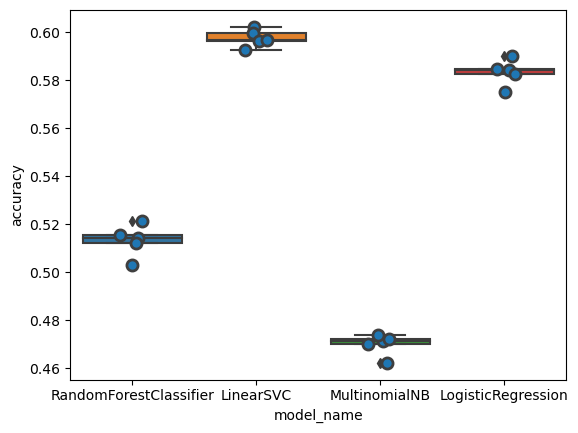

In [66]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, df_train_vectorized, df_train['condition_label'], scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [67]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.597403
LogisticRegression        0.583203
MultinomialNB             0.470043
RandomForestClassifier    0.513247
Name: accuracy, dtype: float64

### LinearSVC

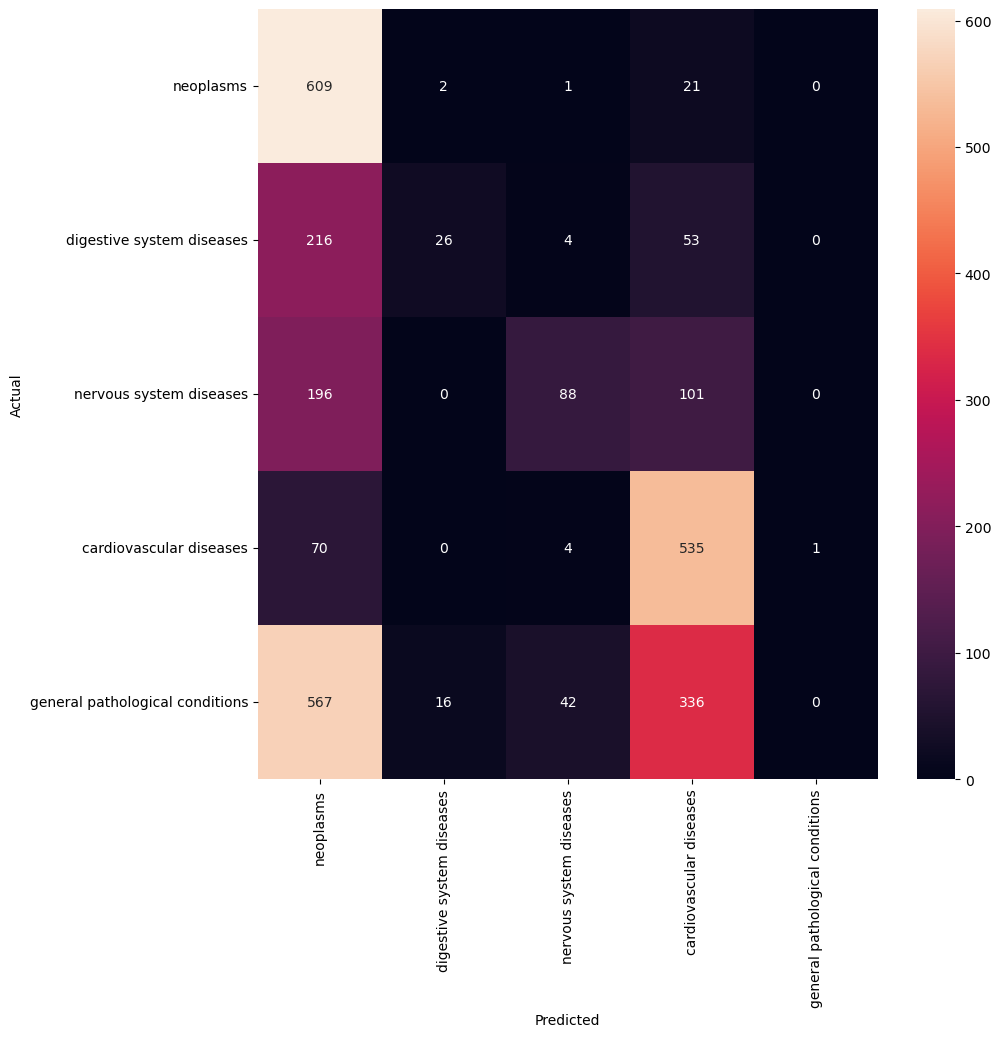

In [68]:
model = LinearSVC()
model.fit(df_train_vectorized, df_train['condition_label'])
y_pred = model.predict(df_test_vectorized)
conf_mat = confusion_matrix(df_test['condition_label'], y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df_labels['condition_name'], yticklabels=df_labels['condition_name'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [69]:
print(metrics.classification_report(df_test['condition_label'], y_pred, target_names=df_labels['condition_name'].unique()))

                                 precision    recall  f1-score   support

                      neoplasms       0.37      0.96      0.53       633
      digestive system diseases       0.59      0.09      0.15       299
        nervous system diseases       0.63      0.23      0.34       385
        cardiovascular diseases       0.51      0.88      0.65       610
general pathological conditions       0.00      0.00      0.00       961

                       accuracy                           0.44      2888
                      macro avg       0.42      0.43      0.33      2888
                   weighted avg       0.33      0.44      0.31      2888



### LogisticRegression

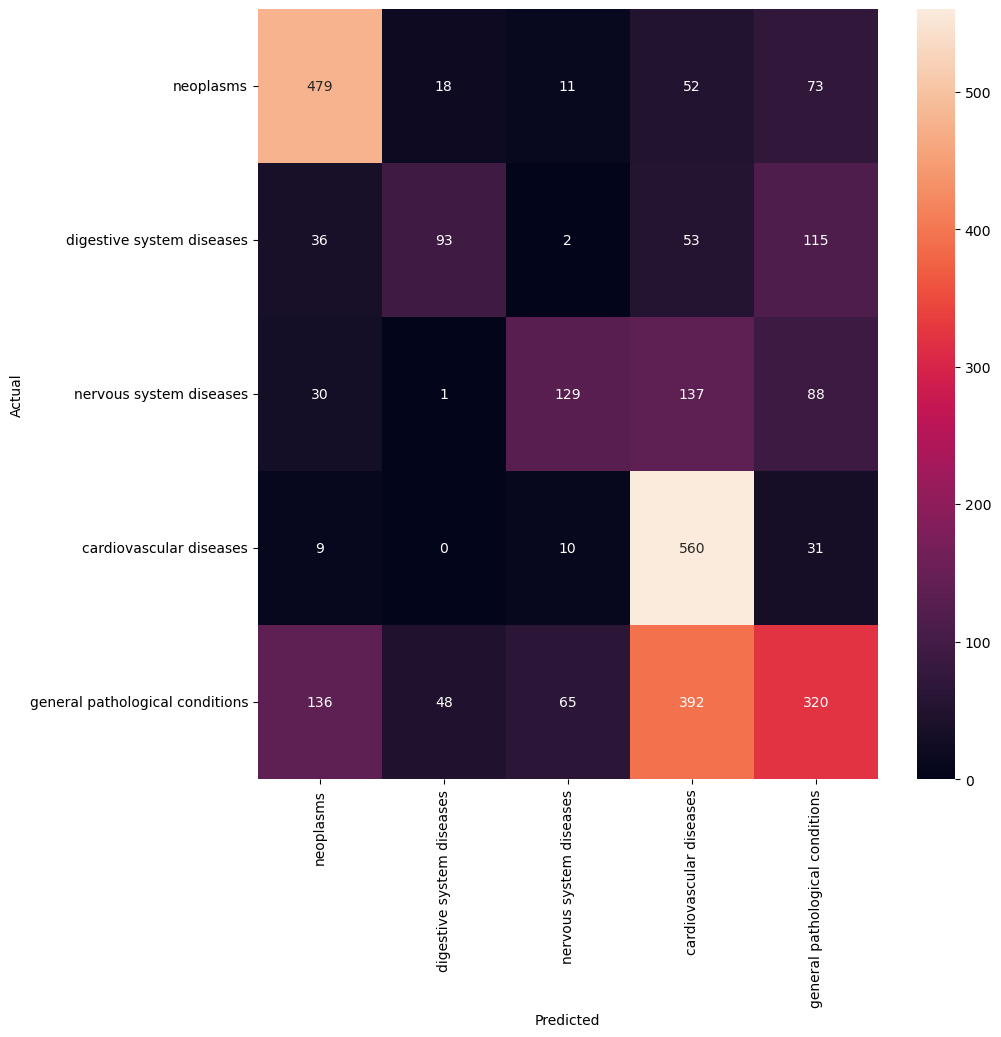

In [70]:
model = LogisticRegression()
model.fit(df_train_vectorized, df_train['condition_label'])
y_pred = model.predict(df_test_vectorized)
conf_mat = confusion_matrix(df_test['condition_label'], y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df_labels['condition_name'], yticklabels=df_labels['condition_name'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [71]:
print(metrics.classification_report(df_test['condition_label'], y_pred, target_names=df_labels['condition_name'].unique()))

                                 precision    recall  f1-score   support

                      neoplasms       0.69      0.76      0.72       633
      digestive system diseases       0.58      0.31      0.41       299
        nervous system diseases       0.59      0.34      0.43       385
        cardiovascular diseases       0.47      0.92      0.62       610
general pathological conditions       0.51      0.33      0.40       961

                       accuracy                           0.55      2888
                      macro avg       0.57      0.53      0.52      2888
                   weighted avg       0.56      0.55      0.52      2888



## SBERT

In [73]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized_sbert.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized_sbert.csv", index_col = 0)

In [74]:
df_train_vectorized.shape

(11550, 90)

In [75]:
df_train_vectorized 

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.616607,1.189709,0.163044,-4.255162,-10.336236,-1.416826,4.179541,3.202433,-7.583324,9.135061,...,3.489802,1.890339,1.156076,1.643675,-1.441126,1.641574,-1.519048,1.272461,0.290292,-1.168891
1,8.576977,-7.926353,4.956910,-5.685285,0.029714,1.606611,-7.484634,-1.612366,1.562350,-6.135988,...,0.030071,1.342888,-1.479624,-1.193076,1.390397,0.006303,-1.586796,-0.308596,-0.935409,0.204483
2,4.682590,-0.370126,-2.928656,10.751392,2.247607,0.792806,3.797949,1.705145,0.427763,1.391312,...,-0.942051,-1.226514,-0.139553,0.154600,1.259220,-0.655931,-0.267402,-2.402808,0.360788,-0.802193
3,7.253185,-11.091978,-5.754353,-7.394103,-1.842386,-0.272723,-2.712155,-1.517870,-0.469065,-0.181906,...,0.823852,1.563496,0.803025,-0.099464,1.030293,0.188704,-0.409031,-0.214835,-1.133815,-0.264556
4,-8.768579,3.162213,3.533551,-4.259306,2.949863,5.308393,4.654664,-3.915478,-2.702052,-4.876094,...,0.925256,0.884794,0.667445,1.660562,1.930705,-1.055190,3.746518,-2.134968,1.332506,-0.342092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11545,5.379106,-3.367289,-7.093979,-3.288449,0.857151,5.091248,7.394490,-8.152246,2.806387,-5.132650,...,-0.166483,-0.655177,0.042713,0.482381,0.210181,-0.087773,-1.118770,0.754808,1.054434,-2.903380
11546,10.309920,0.583784,-2.105708,2.104583,5.534338,5.555518,5.010417,2.734212,3.079867,-1.179401,...,-0.123532,-1.737188,0.571302,0.219042,-1.244807,-0.683786,-2.083695,0.944676,2.021921,-0.320133
11547,0.519966,6.728595,-0.257015,1.891017,3.261941,-6.923624,2.969592,-5.553941,7.827202,5.169727,...,0.502755,2.768543,0.502703,-0.044455,-0.858111,1.186996,0.000037,1.061027,-0.387794,0.295184
11548,0.666565,-7.670900,13.350946,-2.340372,-6.539073,3.501601,-1.291034,0.501449,2.732877,-3.657024,...,-0.375119,-2.874959,0.084487,-1.464204,1.207689,-0.512781,0.987050,1.240985,-0.745788,0.750522


In [76]:
scaler = MinMaxScaler()
df_train_vectorized = scaler.fit_transform(df_train_vectorized)

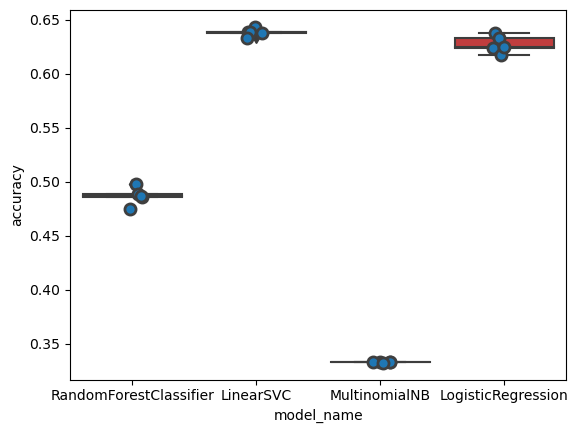

In [77]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, df_train_vectorized, df_train['condition_label'], scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [78]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.638095
LogisticRegression        0.627013
MultinomialNB             0.332814
RandomForestClassifier    0.486667
Name: accuracy, dtype: float64

### LinearSVC

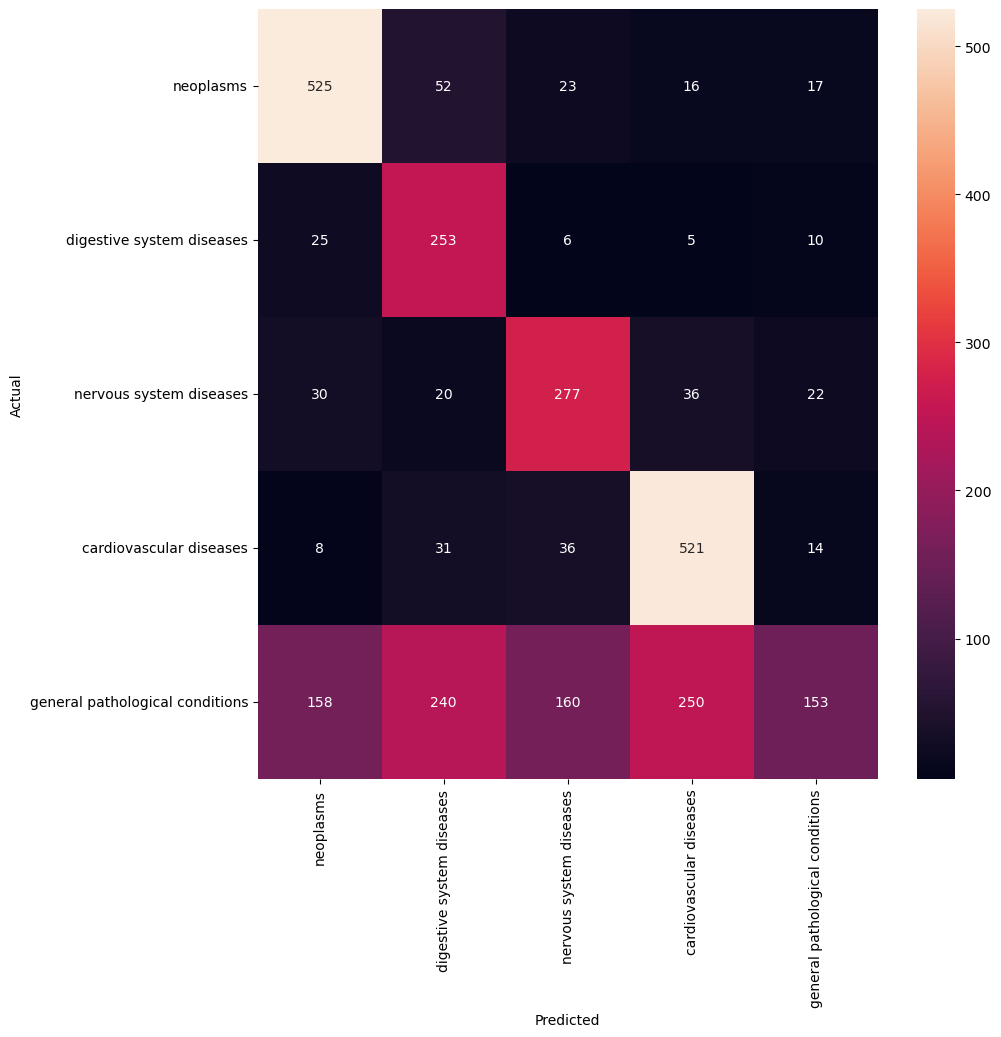

In [79]:
model = LinearSVC()
model.fit(df_train_vectorized, df_train['condition_label'])
y_pred = model.predict(df_test_vectorized)
conf_mat = confusion_matrix(df_test['condition_label'], y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df_labels['condition_name'], yticklabels=df_labels['condition_name'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [80]:
print(metrics.classification_report(df_test['condition_label'], y_pred, target_names=df_labels['condition_name'].unique()))

                                 precision    recall  f1-score   support

                      neoplasms       0.70      0.83      0.76       633
      digestive system diseases       0.42      0.85      0.57       299
        nervous system diseases       0.55      0.72      0.62       385
        cardiovascular diseases       0.63      0.85      0.72       610
general pathological conditions       0.71      0.16      0.26       961

                       accuracy                           0.60      2888
                      macro avg       0.60      0.68      0.59      2888
                   weighted avg       0.64      0.60      0.55      2888



### LogisticRegression

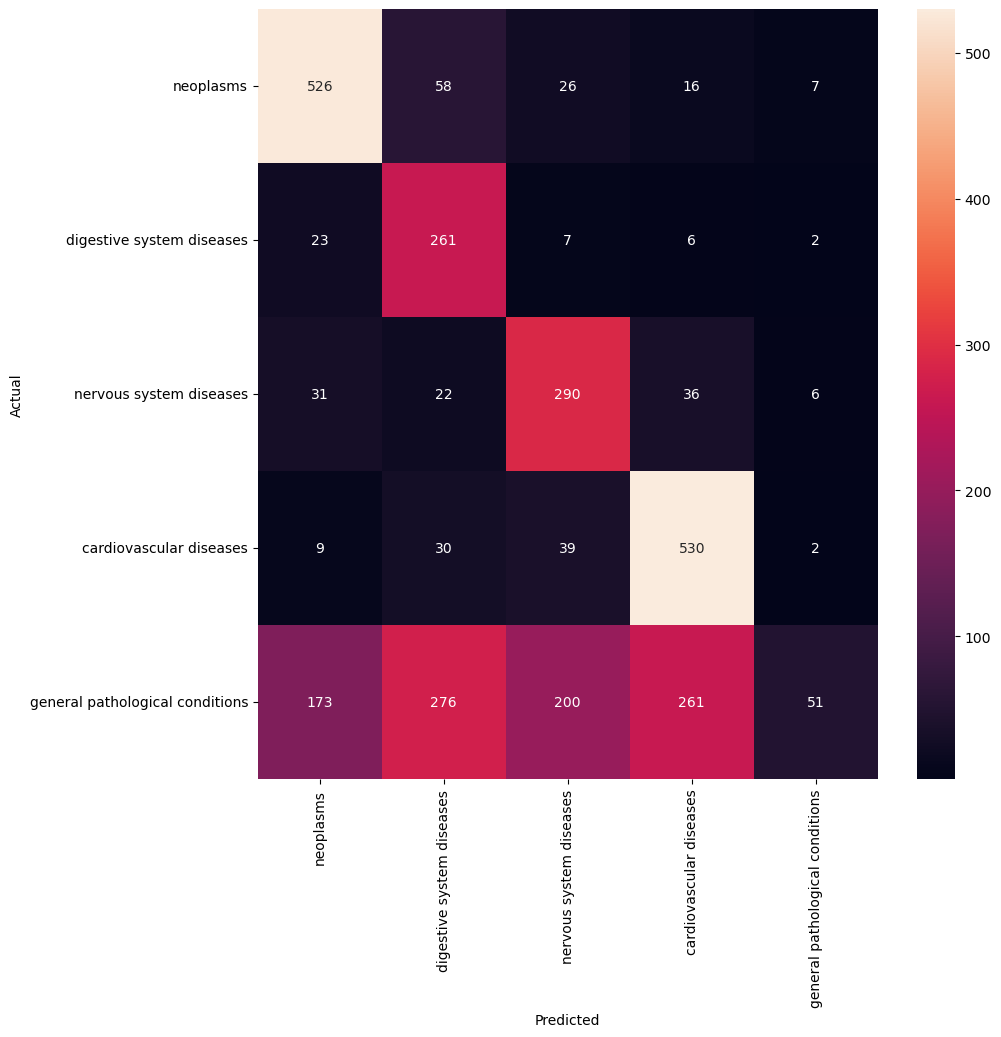

In [81]:
model = LogisticRegression()
model.fit(df_train_vectorized, df_train['condition_label'])
y_pred = model.predict(df_test_vectorized)
conf_mat = confusion_matrix(df_test['condition_label'], y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df_labels['condition_name'], yticklabels=df_labels['condition_name'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [82]:
print(metrics.classification_report(df_test['condition_label'], y_pred, target_names=df_labels['condition_name'].unique()))

                                 precision    recall  f1-score   support

                      neoplasms       0.69      0.83      0.75       633
      digestive system diseases       0.40      0.87      0.55       299
        nervous system diseases       0.52      0.75      0.61       385
        cardiovascular diseases       0.62      0.87      0.73       610
general pathological conditions       0.75      0.05      0.10       961

                       accuracy                           0.57      2888
                      macro avg       0.60      0.68      0.55      2888
                   weighted avg       0.64      0.57      0.49      2888



# Clustering

In [111]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [112]:
label_train = df_train.condition_label.values
label_test = df_test.condition_label.values

In [113]:
labels = np.append(label_train, label_test)

In [114]:
unique_labels, category_sizes = np.unique(labels, return_counts=True)

## Word2Vec

In [125]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized_w2vec.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized_w2vec.csv", index_col = 0)

In [126]:
df_total = pd.concat([pd.DataFrame(df_train_vectorized), pd.DataFrame(df_test_vectorized)], ignore_index = True)

In [127]:
scaler = MinMaxScaler()
df_total = scaler.fit_transform(df_total)

In [128]:
df_total

array([[0.4296332 , 0.25055353, 0.60884658, ..., 0.43636064, 0.45105532,
        0.62436606],
       [0.36936467, 0.5735434 , 0.657109  , ..., 0.59267521, 0.40426307,
        0.50038501],
       [0.37505519, 0.50494403, 0.48976589, ..., 0.44272484, 0.43643903,
        0.465675  ],
       ...,
       [0.64041721, 0.52352984, 0.22037735, ..., 0.81372857, 0.4872554 ,
        0.27291629],
       [0.52360849, 0.58306992, 0.56548392, ..., 0.58734335, 0.50766357,
        0.29921983],
       [0.62280979, 0.47770225, 0.51048135, ..., 0.50879038, 0.47828784,
        0.59023405]])

### PCA 3D

In [129]:
from sklearn.decomposition import PCA

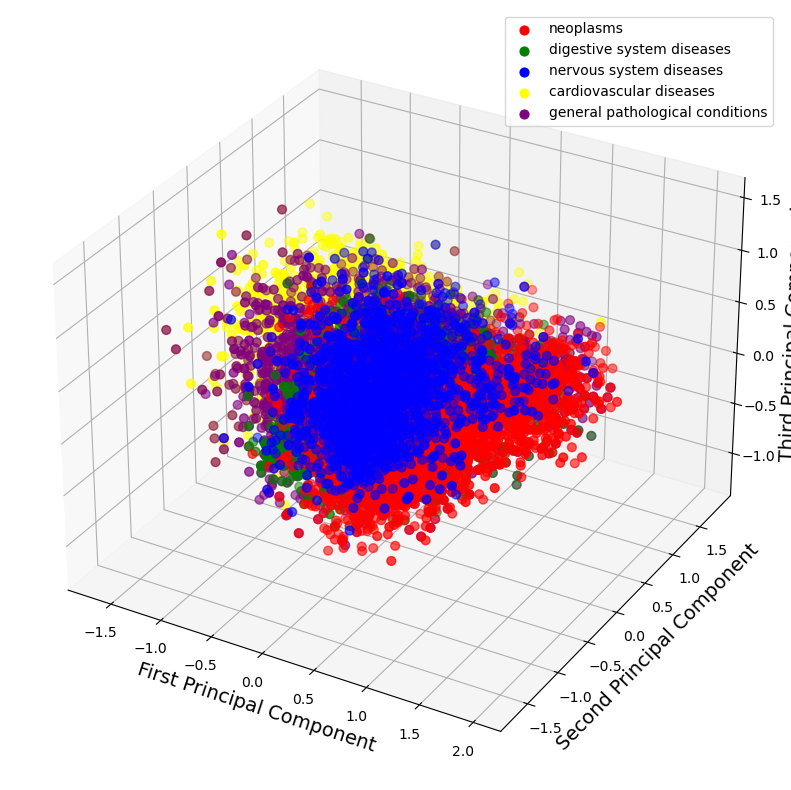

In [130]:
pca = PCA(n_components=3)
pca.fit(df_total) 
X_pca = pca.transform(df_total) 

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:"blue", 4:"yellow", 5:"purple"}
labl = {1:'neoplasms', 2:'digestive system diseases', 3:'nervous system diseases', 4:'cardiovascular diseases', 5:'general pathological conditions'}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], label = labl[l], s=40)

ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

### KMeans

In [131]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [132]:
from collections import defaultdict
from time import time

from sklearn import metrics

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [133]:
kmeans = KMeans(
    n_clusters=5,
)

fit_and_evaluate(kmeans, df_total, name="KMeans\nwith on w2vec vectors")

clustering done in 0.95 ± 0.03 s 
Homogeneity: 0.094 ± 0.000
Completeness: 0.091 ± 0.000
V-measure: 0.092 ± 0.000
Adjusted Rand-Index: 0.062 ± 0.000
Silhouette Coefficient: 0.110 ± 0.002


### Agglomerative clustering

In [135]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

model.fit(df_total)
y_clus = model.labels_

In [136]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''Homogeneity: {metrics.homogeneity_score(y_clus,labels)}''')
print(f'''Completeness: {metrics.completeness_score(y_clus,labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

V measure: 0.09460411485289195
Homogeneity: 0.09267508142650693
Completeness: 0.09661516110610788
ARI: 0.07661714834354358
Sil.: 0.06381804981712093


## SBERT

In [137]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized_sbert.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized_sbert.csv", index_col = 0)

In [138]:
df_total = pd.concat([pd.DataFrame(df_train_vectorized), pd.DataFrame(df_test_vectorized)], ignore_index = True)

In [139]:
df_total.shape

(14438, 90)

In [140]:
df_total

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.616607,1.189709,0.163044,-4.255162,-10.336236,-1.416826,4.179541,3.202433,-7.583324,9.135061,...,3.489802,1.890339,1.156076,1.643675,-1.441126,1.641574,-1.519048,1.272461,0.290292,-1.168891
1,8.576977,-7.926353,4.956910,-5.685285,0.029714,1.606611,-7.484634,-1.612366,1.562350,-6.135988,...,0.030071,1.342888,-1.479624,-1.193076,1.390397,0.006303,-1.586796,-0.308596,-0.935409,0.204483
2,4.682590,-0.370126,-2.928656,10.751392,2.247607,0.792806,3.797949,1.705145,0.427763,1.391312,...,-0.942051,-1.226514,-0.139553,0.154600,1.259220,-0.655931,-0.267402,-2.402808,0.360788,-0.802193
3,7.253185,-11.091978,-5.754353,-7.394103,-1.842386,-0.272723,-2.712155,-1.517870,-0.469065,-0.181906,...,0.823852,1.563496,0.803025,-0.099464,1.030293,0.188704,-0.409031,-0.214835,-1.133815,-0.264556
4,-8.768579,3.162213,3.533551,-4.259306,2.949863,5.308393,4.654664,-3.915478,-2.702052,-4.876094,...,0.925256,0.884794,0.667445,1.660562,1.930705,-1.055190,3.746518,-2.134968,1.332506,-0.342092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14433,-2.091860,10.978544,0.085042,-2.344431,0.055471,-5.910322,3.280557,-0.209511,-3.263662,0.063055,...,0.613050,-0.089147,-0.895091,0.191682,-0.002587,0.277526,-0.555219,-4.521728,2.234866,0.561862
14434,2.285444,2.590646,-0.250847,3.135838,-1.930355,-6.973539,4.640433,-6.244392,2.202326,1.970671,...,0.431011,1.139361,0.252345,3.190995,1.812201,1.746474,-1.566244,1.269746,1.447968,-1.376420
14435,-8.222393,9.467972,-2.772387,-4.082203,3.960321,-2.309252,-0.804030,4.919050,-1.769790,3.992051,...,0.565582,-0.394037,2.604774,-3.136133,0.479923,2.073828,-0.912222,1.583637,2.034607,2.388349
14436,1.989379,-3.773674,-8.946852,-9.751311,1.210414,0.249810,1.892789,-5.646124,4.699552,-0.574261,...,-1.260177,-0.066570,0.271373,-1.021312,0.610535,0.211758,0.278536,1.850418,0.712345,-1.147819


In [141]:
df_total.shape

(14438, 90)

### PCA 3D

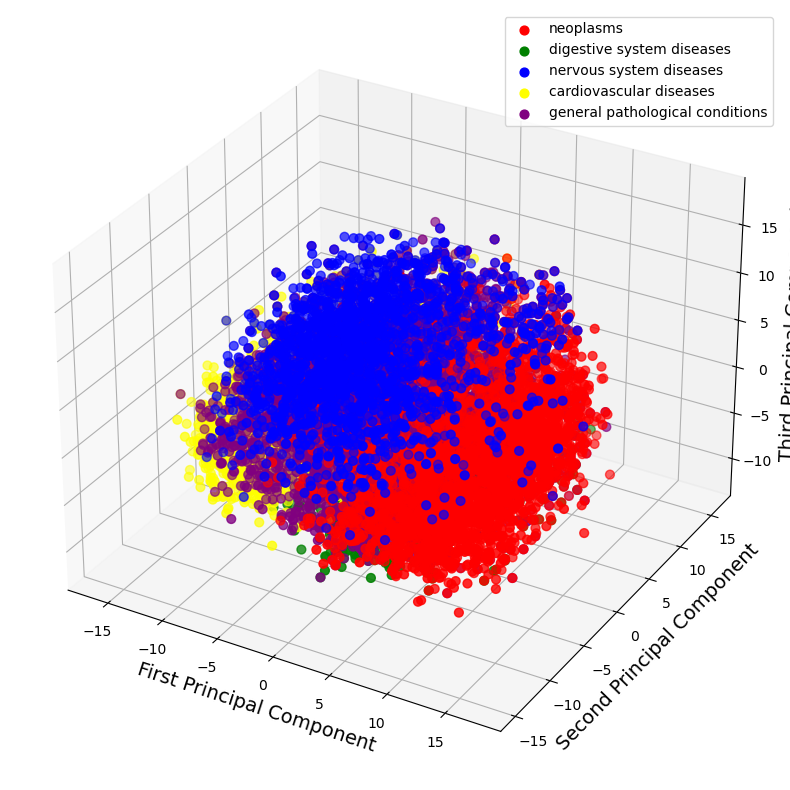

In [142]:
pca = PCA(n_components=3)
pca.fit(df_total) 
X_pca = pca.transform(df_total) 

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:"blue", 4:"yellow", 5:"purple"}
labl = {1:'neoplasms', 2:'digestive system diseases', 3:'nervous system diseases', 4:'cardiovascular diseases', 5:'general pathological conditions'}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], label = labl[l], s=40)

ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

### KMeans

In [143]:
from collections import defaultdict
from time import time

from sklearn import metrics

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [144]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [145]:
kmeans = KMeans(
    n_clusters=5
)

fit_and_evaluate(kmeans, df_total, name="KMeans\nwith on SBERT vectors")

clustering done in 0.87 ± 0.03 s 
Homogeneity: 0.280 ± 0.001
Completeness: 0.267 ± 0.001
V-measure: 0.273 ± 0.001
Adjusted Rand-Index: 0.236 ± 0.001
Silhouette Coefficient: 0.059 ± 0.001


In [146]:
assigned_clusters = kmeans.labels_

In [147]:
assigned_clusters

array([1, 2, 0, ..., 1, 2, 1])

In [148]:
# Count occurrences of each unique value
unique, counts = np.unique(assigned_clusters, return_counts=True)

# Calculate relative frequencies
relative_frequencies = counts / len(assigned_clusters)

# Display results
for value, freq in zip(unique, relative_frequencies):
    print(f"Cluster {value}: Relative Frequency {freq:.2f}")

Cluster 0: Relative Frequency 0.21
Cluster 1: Relative Frequency 0.19
Cluster 2: Relative Frequency 0.24
Cluster 3: Relative Frequency 0.20
Cluster 4: Relative Frequency 0.17


In [149]:
# Count occurrences of each unique value
unique, counts = np.unique(labels, return_counts=True)

# Calculate relative frequencies
relative_frequencies = counts / len(labels)

# Display results
for value, freq in zip(unique, relative_frequencies):
    print(f"Label {value}: Relative Frequency {freq:.2f}")

Label 1: Relative Frequency 0.22
Label 2: Relative Frequency 0.10
Label 3: Relative Frequency 0.13
Label 4: Relative Frequency 0.21
Label 5: Relative Frequency 0.33


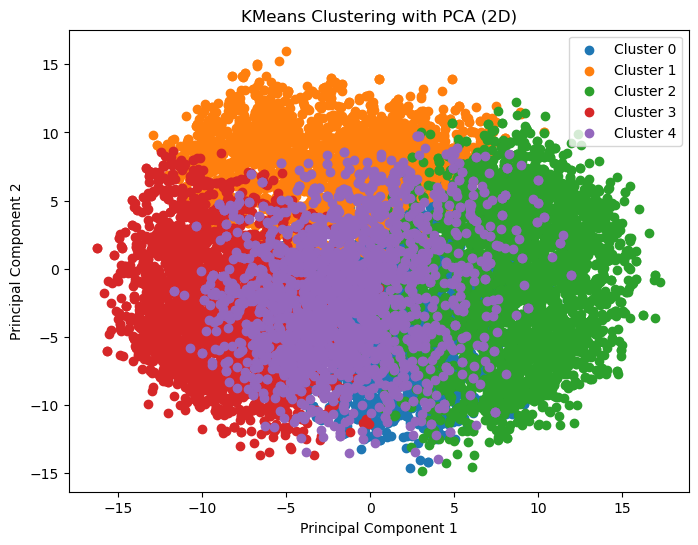

In [150]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_total)

assigned_clusters = kmeans.labels_

# Visualize clusters in 2D after PCA
plt.figure(figsize=(8, 6))
for cluster_id in range(5):
    plt.scatter(X_pca[assigned_clusters == cluster_id, 0], X_pca[assigned_clusters == cluster_id, 1], label=f'Cluster {cluster_id}')
plt.title('KMeans Clustering with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

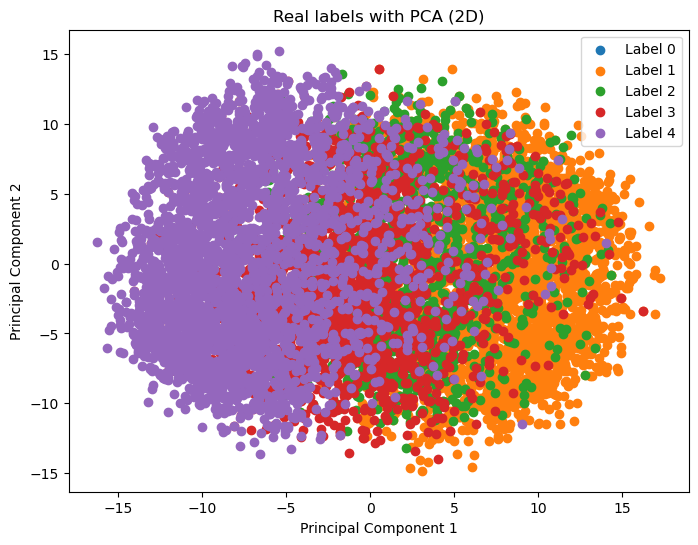

In [151]:
plt.figure(figsize=(8, 6))
for cluster_id in range(5):
    plt.scatter(X_pca[labels == cluster_id, 0], X_pca[labels == cluster_id, 1], label=f'Label {cluster_id}')
plt.title('Real labels with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [152]:
clusters = kmeans.labels_

In [153]:
# Get most frequent words within each cluster
clustered_words = {i: [] for i in range(5)}
for i, sentence in enumerate(sentences):
    words = sentence.split()  # Split sentence into words
    clustered_words[clusters[i]].extend(words)

# Calculate most frequent words for each cluster
most_common_words_per_cluster = {}
for cluster_id, words in clustered_words.items():
    word_counts = Counter(words)
    most_common_words_per_cluster[cluster_id] = word_counts.most_common(10)  

# Display most frequent words for each cluster
for cluster_id, common_words in most_common_words_per_cluster.items():
    print(f"Cluster {cluster_id} - Most common words:")
    for word, count in common_words:
        print(f"{word}: {count} times")
    print()

Cluster 0 - Most common words:
infection: 1658 times
cell: 1448 times
acute: 1151 times
control: 1121 times
chronic: 1106 times
associate: 1024 times
clinical: 988 times
therapy: 964 times
liver: 957 times
study: 925 times

Cluster 1 - Most common words:
complication: 1608 times
artery: 1448 times
year: 1234 times
surgery: 1196 times
use: 1171 times
result: 1160 times
graft: 1099 times
procedure: 1093 times
rate: 1077 times
surgical: 1007 times

Cluster 2 - Most common words:
cell: 5352 times
tumor: 5095 times
cancer: 3380 times
carcinoma: 2799 times
case: 1717 times
survival: 1386 times
primary: 1210 times
therapy: 1200 times
year: 1170 times
result: 1166 times

Cluster 3 - Most common words:
coronary: 2657 times
pressure: 2576 times
ventricular: 2472 times
blood: 2394 times
heart: 2206 times
myocardial: 1822 times
artery: 1760 times
cardiac: 1674 times
increase: 1592 times
leave: 1496 times

Cluster 4 - Most common words:
cerebral: 977 times
syndrome: 913 times
control: 859 times
bra

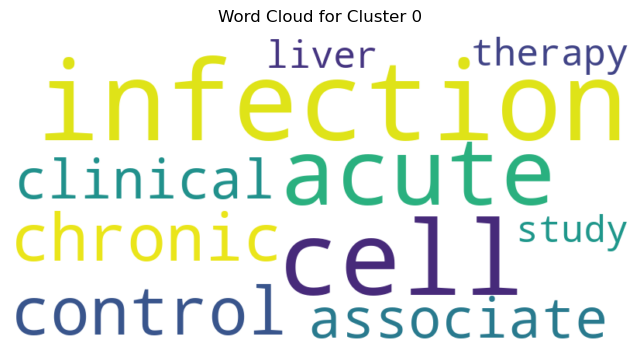

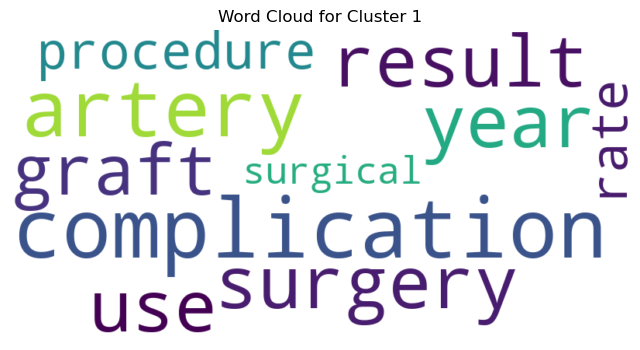

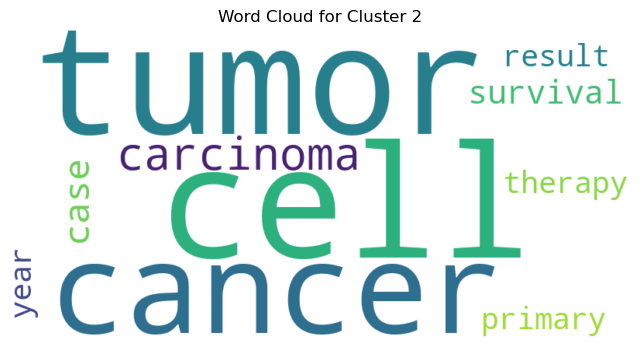

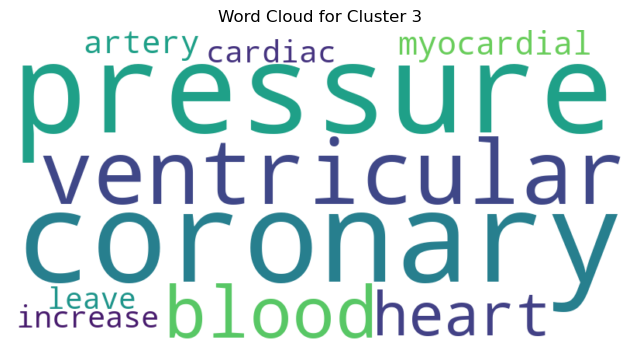

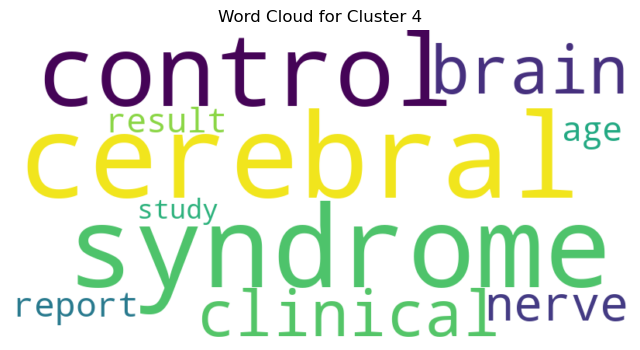

In [154]:

from wordcloud import WordCloud# Create word cloud for each cluster
for cluster_id, common_words in most_common_words_per_cluster.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.axis('off')
    plt.show()

In [155]:
# Calculate percentage of real label in each cluster
from collections import Counter

def percentage_real_label_in_clusters(true_labels, clustered_labels, cluster_num):
    cluster_indices = [i for i, label in enumerate(clustered_labels) if label == cluster_num]
    true_labels_in_cluster = [true_labels[i] for i in cluster_indices]
    label_counts = Counter(true_labels_in_cluster)
    total_samples = len(true_labels_in_cluster)
    percentages = {label: count / total_samples * 100 for label, count in label_counts.items()}
    return percentages

In [156]:
for cluster_num in range(5):
    percentages_cluster= percentage_real_label_in_clusters(labels, assigned_clusters, cluster_num)
    print(f"Percentage of real labels in cluster {cluster_num}:")
    for label, percentage in percentages_cluster.items():
        print(f"Label {label}: {percentage:.2f}%")

Percentage of real labels in cluster 0:
Label 2: 32.75%
Label 4: 6.88%
Label 5: 43.86%
Label 3: 7.21%
Label 1: 9.30%
Percentage of real labels in cluster 1:
Label 5: 47.14%
Label 2: 10.18%
Label 4: 27.78%
Label 1: 8.13%
Label 3: 6.77%
Percentage of real labels in cluster 2:
Label 1: 72.63%
Label 5: 17.92%
Label 2: 4.11%
Label 4: 1.69%
Label 3: 3.64%
Percentage of real labels in cluster 3:
Label 3: 5.57%
Label 4: 64.94%
Label 5: 26.76%
Label 2: 1.60%
Label 1: 1.14%
Percentage of real labels in cluster 4:
Label 3: 51.82%
Label 5: 33.51%
Label 4: 7.67%
Label 1: 5.53%
Label 2: 1.47%


In [157]:
# Function to plot a pie chart for percentage of real labels in a cluster
def plot_pie_chart(percentages, cluster_num):
    label_map = {
    1: "Neoplasms",
    2: "Digestive system diseases",
    3: "Nervous system diseases",
    4: "Cardiovascular diseases",
    5: "General pathological conditions",
    }
    label_colors = {
    "Neoplasms": 'firebrick',
    "Digestive system diseases": 'blue',
    "Nervous system diseases": 'green',
    "Cardiovascular diseases": 'orange'   ,
    "General pathological conditions":'purple'
    # Add more labels and their respective colors as needed
    }
    #colors = ['firebrick', 'blue', 'green', 'orange', 'purple']  # Example colors
    labels = [label_map[label] for label in percentages.keys()]
    # Retrieve colors based on labels
    colors = [label_colors[label] for label in labels]
    sizes = list(percentages.values())
    plt.figure(figsize=(8, 6))
    patches, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Percentage of real labels in cluster {cluster_num}")
    custom_labels = [f'{label} ({sizes[i]:.2f}%)' for i, label in enumerate(labels)]
    plt.legend(patches, custom_labels, loc="best", fontsize='small')
    plt.axis('equal')

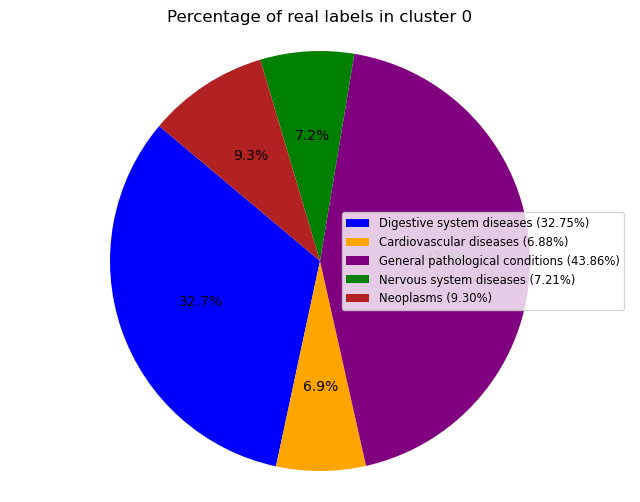

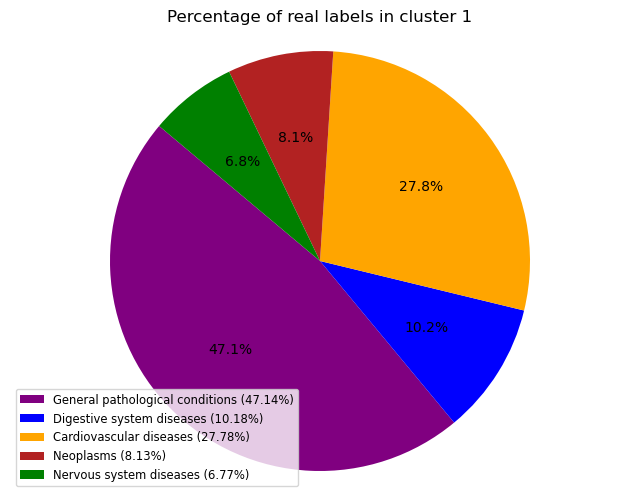

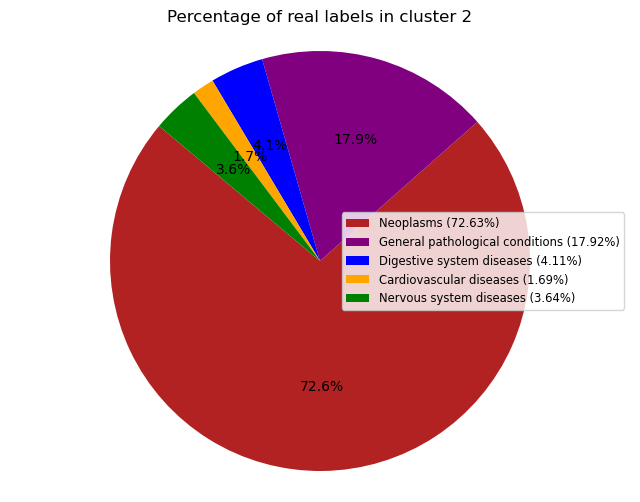

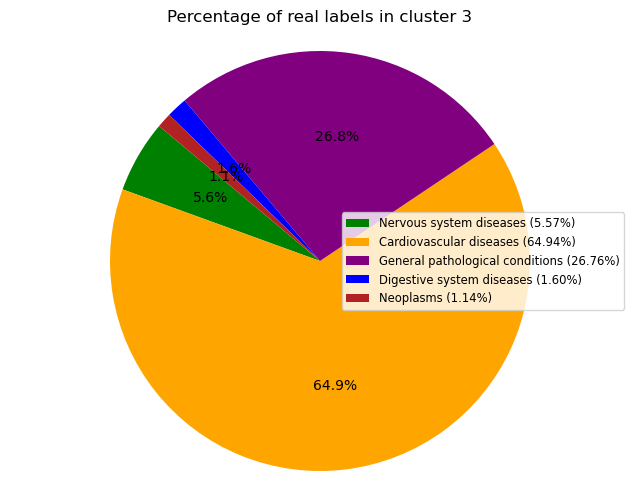

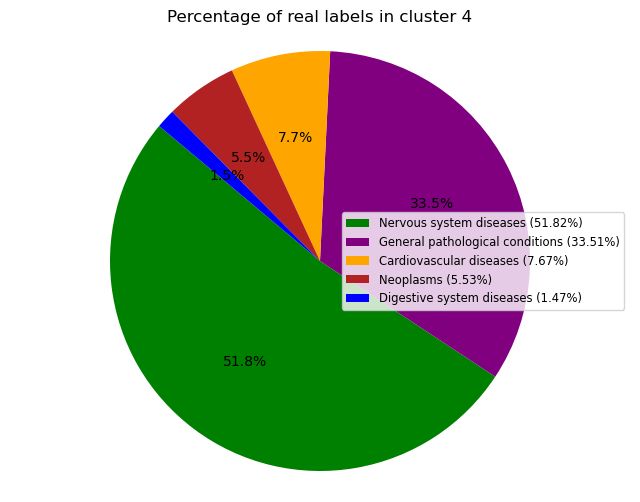

In [158]:
for cluster_num in range(5):
    percentages_cluster = percentage_real_label_in_clusters(labels, clusters, cluster_num)
    plot_pie_chart(percentages_cluster, cluster_num)

In [159]:
df_labels

,condition_label,condition_name
0,1,neoplasms
1,2,digestive system diseases
2,3,nervous system diseases
3,4,cardiovascular diseases
4,5,general pathological conditions


In [179]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test.csv", index_col = 0)

In [167]:
df_train

,medical_abstract
condition_label,
5,Tissue changes around loose prostheses. A cani...
1,Neuropeptide Y and neuron-specific enolase lev...
2,"Sexually transmitted diseases of the colon, re..."
1,Lipolytic factors associated with murine and h...
3,Does carotid restenosis predict an increased r...
...,...
1,Epirubicin at two dose levels with prednisolon...
1,Four and a half year follow up of women with d...
5,Safety of the transbronchial biopsy in outpati...


In [168]:
df_test

,medical_abstract
condition_label,
3,Obstructive sleep apnea following topical orop...
5,Neutrophil function and pyogenic infections in...
5,A phase II study of combined methotrexate and ...
1,Flow cytometric DNA analysis of parathyroid tu...
4,Paraneoplastic vasculitic neuropathy: a treata...
...,...
4,Management of aortobronchial fistula with graf...
5,Tuberculous psoas muscle abscess following che...
4,Clinical evaluation of high-frequency (ultraso...


In [169]:
df_t = pd.concat([df_train, df_test]).reset_index(drop=True)

In [170]:
df_t

,medical_abstract
0,Tissue changes around loose prostheses. A cani...
1,Neuropeptide Y and neuron-specific enolase lev...
2,"Sexually transmitted diseases of the colon, re..."
3,Lipolytic factors associated with murine and h...
4,Does carotid restenosis predict an increased r...
...,...
14433,Management of aortobronchial fistula with graf...
14434,Tuberculous psoas muscle abscess following che...
14435,Clinical evaluation of high-frequency (ultraso...
14436,Antitumor activity of liposome-encapsulated do...


In [173]:
# Get the index of the centroid record for each cluster
centroid_indices = []
for cluster_label in range(5):
    # Find the index of the data point closest to the centroid of the current cluster
    centroid_index = np.argmin(np.linalg.norm(df_total - kmeans.cluster_centers_[cluster_label], axis=1))
    centroid_indices.append(centroid_index)

# Print the index of the centroid record for each cluster
for cluster_label, centroid_index in enumerate(centroid_indices):
    print(f"Cluster {cluster_label}: Centroid Index = {centroid_index} Real Label = {labels[centroid_index]}")
    print(f"Centroid Record: {df_t.loc[centroid_index].medical_abstract}")

Cluster 0: Centroid Index = 3412 Real Label = 2
Centroid Record: Selective intestinal decontamination increases serum and ascitic fluid C3 levels in cirrhosis. Selective intestinal decontamination for 7 days with norfloxacin was performed in 14 cirrhotic patients with ascites and low ascitic fluid total protein. Variations in serum and ascitic fluid of C3 and C4 and ascitic fluid total protein after therapy were compared with those of a control group of 14 untreated patients with similar characteristics. After oral norfloxacin administration, we saw a significant increase of C3 in serum (p less than 0.05) and ascitic fluid (p = 0.01). A significant increase was also observed in ascitic fluid total protein (p less than 0.05) but not in serum and ascitic fluid C4. There were no changes in serum C3, ascitic fluid C3, ascitic fluid C4 or in ascitic fluid total protein in group 2. These data demonstrate that selective intestinal decontamination increases serum and ascitic fluid C3 levels an

### Agglomerative clustering

In [161]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

model.fit(df_total)
y_clus = model.labels_

In [162]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''Homogeneity: {metrics.homogeneity_score(y_clus,labels)}''')
print(f'''Completeness: {metrics.completeness_score(y_clus,labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

V measure: 0.20428677815008706
Homogeneity: 0.20636085108537153
Completeness: 0.20225398216069918
ARI: 0.14549059002126996
Sil.: 0.02374008356095281


In [163]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate pairwise cosine similarity (or distance)
similarity_matrix = cosine_similarity(df_total)

# Convert cosine similarity to distance
distance_matrix = 1 - similarity_matrix

# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete')
y_clus = agglomerative.fit_predict(distance_matrix)

In [164]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''Homogeneity: {metrics.homogeneity_score(y_clus,labels)}''')
print(f'''Completeness: {metrics.completeness_score(y_clus,labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

V measure: 0.1614907443372099
Homogeneity: 0.15896539722815486
Completeness: 0.16409762271675934
ARI: 0.10658682725023996
Sil.: 0.017786846198365024
